In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.random.seed(0xdeadbeef)

In [2]:
def make_sample(nexamples, means=([0., 0.], [1., 1.]), sigma=1.):
    normal = np.random.multivariate_normal
    # squared width
    s2 = sigma**2
    # below we provide the coordinates of the mean as a first argument
    # and then the covariance matrix which describes the width of the gaussian along the 2 directions
    sgx0 = normal(means[0], [[s2, 0.], [0., s2]], nexamples)
    sgx1 = normal(means[1], [[s2, 0.], [0., s2]], nexamples)
    # setting labels for each category
    sgy0 = np.zeros((nexamples,))
    sgy1 = np.ones((nexamples,))
    sgx = np.concatenate([sgx0, sgx1])
    sgy = np.concatenate([sgy0, sgy1])
    return sgx, sgy

In [3]:
sgx, sgy = make_sample(30)
tgx, tgy = make_sample(200)

Text(0, 0.5, 'x2')

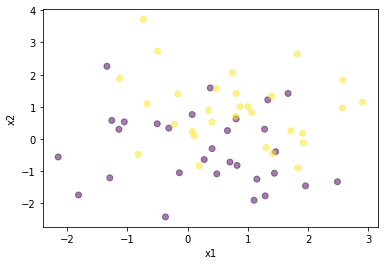

In [4]:
# not how the 2 categories are plotted together in one go by providing the label array as color argument (x=sgy)
plt.scatter(sgx[:, 0], sgx[:, 1], alpha=0.5, c=sgy)
plt.xlabel("x1")
plt.ylabel("x2")

In [5]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50, 50, 50), activation="relu", max_iter=10000, random_state=1)
mlp.fit(sgx, sgy)

MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=10000, random_state=1)

In [6]:
def plot_results(sample, targets, linrange=(-5, 5, 101)):
    xmin, xmax, npoints = linrange
    gridx1, gridx2 = np.meshgrid(np.linspace(xmin, xmax, npoints), np.linspace(xmin, xmax, npoints))
    grid = np.c_[gridx1.flatten(), gridx2.flatten()]
    probs = mlp.predict_proba(grid)
    plt.pcolor(gridx1, gridx2, probs[:, 1].reshape(npoints, npoints), cmap="binary")
    plt.colorbar()
    plt.scatter(sample[:, 0], sample[:, 1], c=targets, cmap="plasma", alpha=0.5, marker=".")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

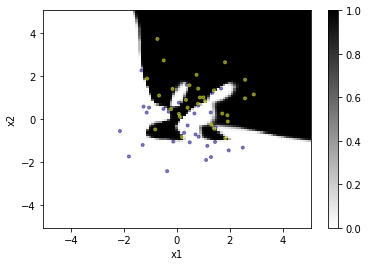

In [7]:
plot_results(sgx, sgy)

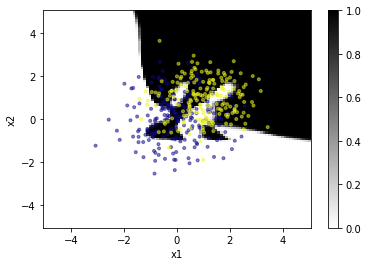

In [8]:
plot_results(tgx, tgy)

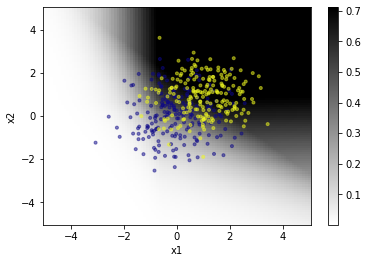

In [9]:
mlp = MLPClassifier(hidden_layer_sizes=(5,), activation="relu", max_iter=10000, random_state=1)
mlp.fit(sgx, sgy)
plot_results(tgx, tgy)

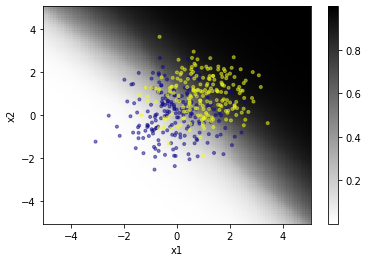

In [10]:
sgx, sgy = make_sample(10000)
mlp = MLPClassifier(hidden_layer_sizes=(50, 50, 50), activation="relu", max_iter=10000, random_state=1)
mlp.fit(sgx, sgy)
plot_results(tgx, tgy)

In [11]:
sgxa, sgya = make_sample(1000, ([0., 0.], [3., 3.]), 0.3)
sgxb, sgyb = make_sample(1000, ([1., 1.], [4., 4.]), 0.3)
sgxc, sgyc = make_sample(1000, ([5., 5.], [-2., -2.]), 0.6)
sgxd, sgyd = make_sample(1000, ([-1., 3.], [3., -1.]), 0.3)

sgx = np.concatenate([sgxa, sgxb, sgxc, sgxd])
sgy = np.concatenate([sgya, sgyb, sgyc, sgyd])

Text(0, 0.5, 'x2')

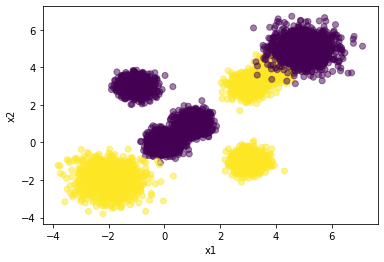

In [12]:
plt.scatter(sgx[:, 0], sgx[:, 1], alpha=0.5, c=sgy)
plt.xlabel("x1")
plt.ylabel("x2")

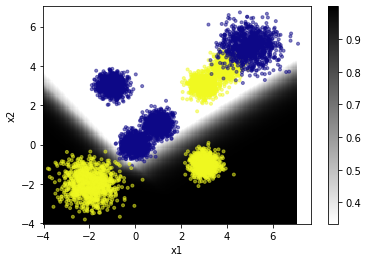

In [13]:
mlp = MLPClassifier(hidden_layer_sizes=(3,), activation="relu", max_iter=10000, random_state=1)
mlp.fit(sgx, sgy)
plot_results(sgx, sgy, linrange=(-4, 7, 201))

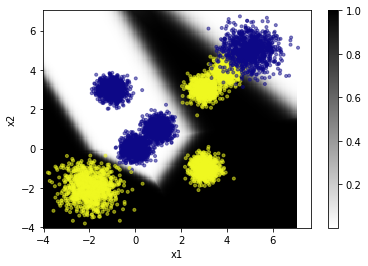

In [14]:
mlp = MLPClassifier(hidden_layer_sizes=(5,), activation="relu", max_iter=10000, random_state=1)
mlp.fit(sgx, sgy)
plot_results(sgx, sgy, linrange=(-4, 7, 201))

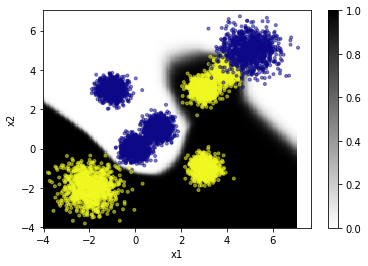

In [15]:
mlp = MLPClassifier(hidden_layer_sizes=(50, 50, 50), activation="relu", max_iter=10000, random_state=1)
mlp.fit(sgx, sgy)
plot_results(sgx, sgy, linrange=(-4, 7, 201))